<a href="https://colab.research.google.com/github/HemersonFarias/Gorjetas_dia_semana/blob/main/Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando a base de dados

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/0. Data Science/Alura/Explorando o Seabron/tips.csv')

In [ ]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
renomear = {'total_bill': 'valor_da_conta', 
             'tip': 'gorjeta',
             'dessert': 'sobremesa',
             'day': 'dia_da_semana', 
             'time': 'hora_do_dia', 
             'size': 'total_de_pessoas'}


In [ ]:
gorjetas=dados.rename(columns = renomear)

In [ ]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map({'No':'Não', 'Yes':'Sim'})


In [ ]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sat,Dinner,3
240,27.18,2.00,Sim,Sat,Dinner,2
241,22.67,2.00,Sim,Sat,Dinner,2
242,17.82,1.75,Não,Sat,Dinner,2


In [ ]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map({'Dinner':'Jantar', 'Lunch':'Almoço'})

In [ ]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Jantar,2
1,10.34,1.66,Não,Sun,Jantar,3
2,21.01,3.50,Não,Sun,Jantar,3
3,23.68,3.31,Não,Sun,Jantar,2
4,24.59,3.61,Não,Sun,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sat,Jantar,3
240,27.18,2.00,Sim,Sat,Jantar,2
241,22.67,2.00,Sim,Sat,Jantar,2
242,17.82,1.75,Não,Sat,Jantar,2


In [ ]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

In [ ]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map({'Sun':'Domingo', 'Sat':'Sábado', 'Thur':'Quinta', 'Fri':'Sexta'})

In [ ]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


# 2. Comparando distribuições

## 2.0 Importando o Seaborn

In [ ]:
import seaborn as sns

In [ ]:
!pip show seaborn #versão 0.11.2


Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, matplotlib, pandas, scipy
Required-by: missingno


## 2.1 Análisando o valor da conta 

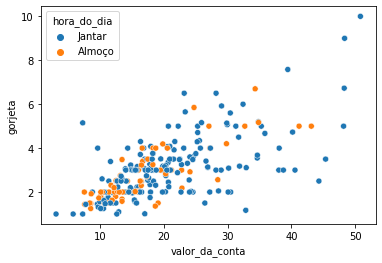

In [ ]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta',hue = 'hora_do_dia', data=gorjetas)

In [ ]:
gorjetas.count()

valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

In [ ]:
gorjetas.shape

(244, 6)

## 2.2 Porcentagem de gorjetas

In [ ]:
gorjetas['porcentagem'] = gorjetas.gorjeta/gorjetas.valor_da_conta

In [ ]:
gorjetas['porcentagem'] = gorjetas['porcentagem'].round(3)

In [ ]:
gorjetas['porcentagem']

0      0.059
1      0.161
2      0.167
3      0.140
4      0.147
       ...  
239    0.204
240    0.074
241    0.088
242    0.098
243    0.160
Name: porcentagem, Length: 244, dtype: float64

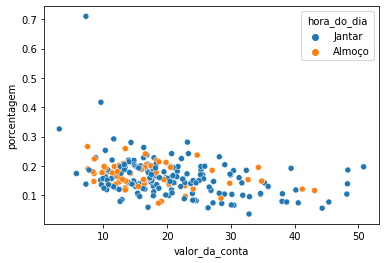

In [ ]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem',hue = 'hora_do_dia',data=gorjetas)

## Relplot e Implot
relplot -> gera o gráfico em linha ou scatter, depende como coloco em kind \\
lmplot  -> coloca uma linha média para mostrar como se comporta a relação x,y


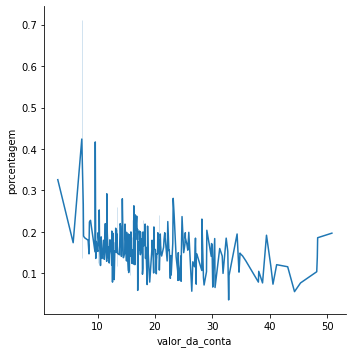

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', kind ='line', data=gorjetas)

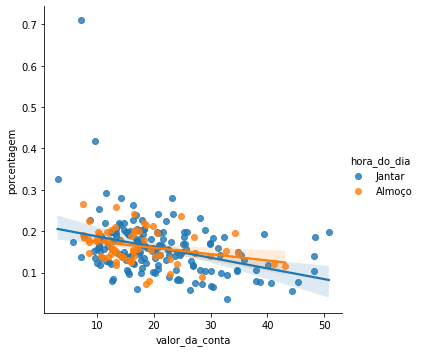

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue ='hora_do_dia', data=gorjetas)

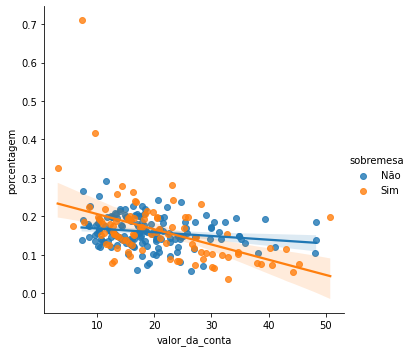

In [ ]:
porcentagem_conta_linha_sobremesa = sns.lmplot(x='valor_da_conta', y='porcentagem', hue ='sobremesa', data=gorjetas)

In [ ]:
porcentagem_conta_linha_sobremesa

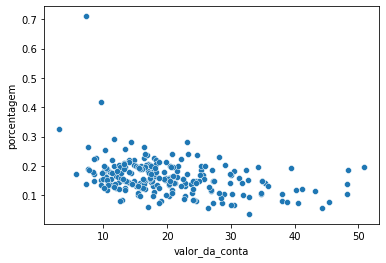

In [ ]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y = 'porcentagem', data = gorjetas)

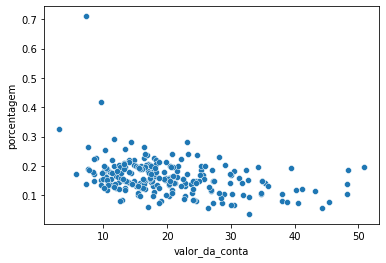

In [ ]:
porcentagem_conta.get_figure()

In [ ]:
porcentagem_conta.set_title('Valor da conta x porcentagem') 

Text(0.5, 1.0, 'Valor da conta x porcentagem')

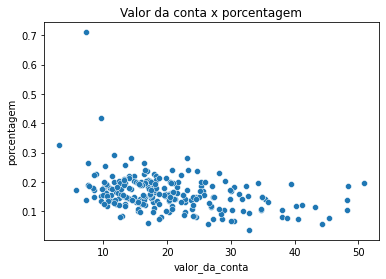

In [ ]:
porcentagem_conta.get_figure()

In [ ]:
porcentagem_conta.set(ylabel = 'Porcentagem da gorgeta', xlabel = 'Valor da conta')

[Text(17.200000000000003, 0.5, 'Porcentagem da gorgeta'),
 Text(0.5, 17.200000000000003, 'Valor da conta')]

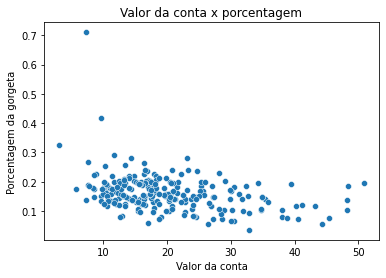

In [ ]:
porcentagem_conta.get_figure()

## Salvando uma imagem

In [ ]:
imagem = porcentagem_conta.get_figure()

In [ ]:
imagem.savefig('imagem.jpg')

# 3. Analisando melhor

In [ ]:
gorjetas.describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160816
std,8.902412,1.383638,0.951100,0.061074
min,3.070000,1.000000,1.000000,0.036000
25%,13.347500,2.000000,2.000000,0.128750
50%,17.795000,2.900000,2.000000,0.154500
75%,24.127500,3.562500,3.000000,0.191250
max,50.810000,10.000000,6.000000,0.710000


In [ ]:
gorjetas[gorjetas.sobremesa=='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085093
min,3.070000,1.000000,1.000000,0.036000
25%,13.420000,2.000000,2.000000,0.107000
50%,17.920000,3.000000,2.000000,0.154000
75%,26.860000,3.680000,3.000000,0.195000
max,50.810000,10.000000,5.000000,0.710000


In [ ]:
gorjetas[gorjetas.sobremesa=='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159331
std,8.255582,1.377190,1.017984,0.039949
min,7.250000,1.000000,1.000000,0.057000
25%,13.325000,2.000000,2.000000,0.136500
50%,17.590000,2.740000,2.000000,0.156000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.292000


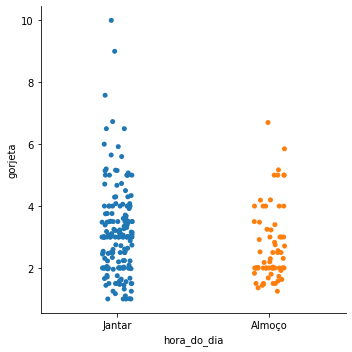

In [ ]:
sns.catplot(x='hora_do_dia', y='gorjeta', data=gorjetas)

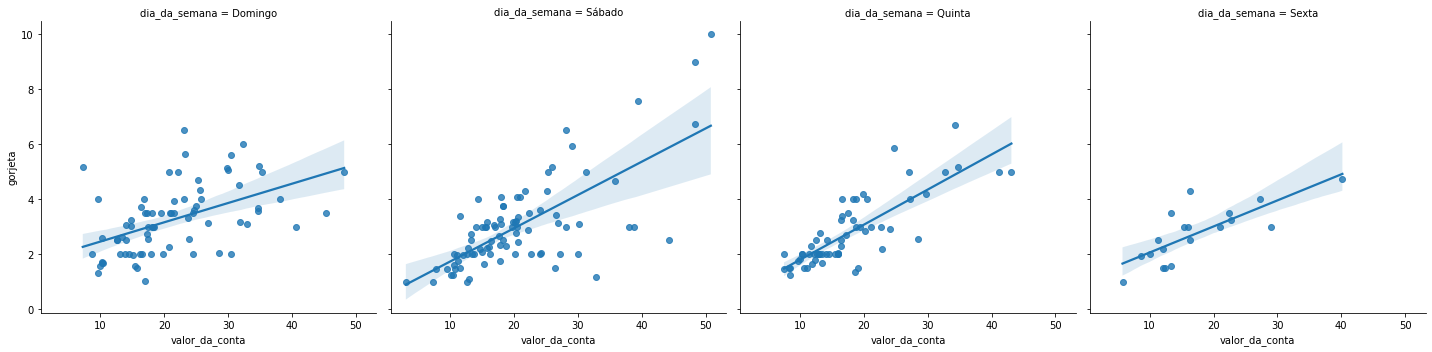

In [ ]:
sns.lmplot(x='valor_da_conta',y='gorjeta',col='dia_da_semana',data=gorjetas)